# CRIME STATISTICS DATA ANALYTICS
## Data Exploration via visualization

** **
** **

In [ ]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

NameError: ignored

## Introduction

Crime isn't a topic most people want to use mental energy to think about. We want to avoid harm, protect our loved ones, and hold on to what we claim is ours. So how do we remain vigilant without digging too deep into the filth that is crime? Data, of course. The focus of our study is to explore possible trends between crime and communities in the city of Calgary. Our purpose is visualize Calgary criminal behaviour in order to help increase awareness for both citizens and law enforcement. Through the use of our visuals, individuals can make more informed decisions to improve the overall safety of their lives. Some of the main concerns of the study include: how crime rates increase with population, which areas in Calgary have the most crime, and if crime adheres to time-sensative patterns.




## Dataset

The dataset of interest is called Community Crime Statistics, and it's under the domain of the City of Calgary Police server. The domain provides information on the type of reported crimes dating back from January 1, 2012 to September 18, 2018. The crime statistics and Calgary shapefile datasets were obtained from the Open Calgary public data portal. Permission to use the data is obtained through consenting to the terms of use under this license https://data.calgary.ca/d/Open-Data-Terms/u45n-7awa. The dataset format provides information about the crime type, date, frequency of crime, resident count, sector and neighborhood. 

Community information is tabulated through the columns Sector, Community Name, and Resident Count. 
The Sector column describes the quadrant that the neighborhood is situated in. Community Name provides the location as to where the incident occurred. These locations are also in the form of longitude and latitude coordinates, which indicate the center point of each community. Resident Count is the number of citizens residing in a community; a value obtained from the Civic Census of that year.  

Criminal activity is described in the Crime Count, Date, ID, and Category columns. Date indicates the first day of that month and year when the incident occurred. Additionally, month and year data can be found in the columns Month and Year. Category types include: Assault (non-domestic), Commercial Break & Enter, Commercial Robbery, Physical Disorder, Residential Break & Enter, Social Disorder, Street Robbery, Theft FROM Vehicle, Theft OF Vehicle, Violence ‘Other’ (Non-domestic). Crime Count is based on the most serious violation per incident. (Open Calgary, 2018, online)



## Guiding Questions

The guiding questions proposed for this study were generated with the generalization that civilians and law enforcement will find the data useful for their own purposes. In respect to residents, the visuals may aid in their decision about the community they want to move to or continue to reside in. They may also want additional insight regarding criminal behaviour in the city, over time. From this insight, they can take proper precautionary measures by learning what kinds of crime frequently occur in their area. Alternatively, police may find the data useful in preventing crimes by studying the trends of areas with denser crime activities and the change in crime rates over time. The following are our guiding questions:

** 1.	How does the crime distribution change over time? **

If there is a pattern of crime over certain time periods, then it may benefit police to study said pattern. If crime rates increase during certain time periods, then law enforcement may want alter officer schedules to counteract those trends.

** 2.	What’s the frequency of the crimes by category? **

Presenting the frequency of certain crime types may prepare residents and police to better responds during certain crises. Studying crime types may expose if there are more an increase of activity or variety in certain areas during different times such as deteriorating economy. 

** 3.	Is the amount of crime affected by population? **

Showing the crime rate (crime per resident) by neighbourhood can help evaluate the risk for individuals. 

** 4.	How is crime distributed throughout the city? **

Presenting the trend by community helps residents monitor the safety of their neighbourhood and allows police to allocate resources to deteriorating communities.


To answer our guiding questions, we will use Python within the Jupyter notebook environment to create visualizations of the dataset. The main software libraries we’ll be importing are Geopandas, Pandas and Matplotlib. Because the dataset provided has been pre-cleaned by the source, minimum cleaning will be required.



In [ ]:
# we have imported all the libraries here:
import matplotlib.pyplot as plt

import geopandas as gpd
import matplotlib as mpl
mpl.style.use('ggplot')

import numpy as np
import pandas as pd
import datetime as dt
from IPython.display import Image
from IPython.display import HTML

import plotly.plotly as py
import plotly.offline as plotly
import plotly.graph_objs as go
plotly.init_notebook_mode(connected=True)

mpl.rcParams['figure.dpi']= 96
mpl.style.use('ggplot')
import csv
import warnings
warnings.filterwarnings('ignore')  


## Data Wrangling

Our data set was relatively clean. We encountered a few minor text formatting issues with the Violent crime category and zero resident count. Only a small amount of cleaning and wrangling was required to obtain our visualizations. Our cleaning and wrangling activities included:

1. Filtering incomplete data:
    The 2018 census has not been completed so the data set does not include up to date resident count for the current year.
2. Data type conversion:
    We have converted Year and Month from string to year and month. 
3. Clean up category with extra characters to make sure we don't have duplicate categories.
4. Deleting of columns:
    The ID column is a unique identifier of each row which does not provide any statistical information.
    Date Column includes the first day of the month which includes the same information as Year and Month columns. 
5. Manipulating data frame:
    Organize the data frames grouped by Sector, Community Name, Category or Year to generate respective visualizations.

In [ ]:
# Read Data

dataset = pd.read_csv("Community_Crime_Statistics.csv") # Read data from data.calgary.ca - Calgary Crime Statistics
map_df = gpd.read_file("calgarycommunities.shp") # Read shapefile into jupyter and geopandas

In [ ]:
# Data Wrangling

display(dataset.head(),"Raw Data") # Raw data table
display(dataset.describe(), "Statistical Information from Raw Data") # Describe information from raw data
display(map_df.head(),"Choropleth Shapefile Data") # Shapefile data
display(map_df.describe(), "Statistical Information from Shapefile Data") # Describe information from shapefile data

# Remove incomplete data: remove all resident count that is zero and special
# characters that were only found in the 2018 data. So main focus of the 
# study will be years 2012 to 2018

#Data type conversion
dataset['Date'] = pd.to_datetime(dataset['Date'],format='%m/%d/%Y %I:%M:%S %p')
dataset['Month'] = dataset['Date'].dt.month # Convert month column to numbers to keep sorted order
dataset['Year'] = dataset['Date'].dt.year

#clean up category with extra characters to make sure we don't have duplicate categories
dataset.Category.replace("Violence\xa0 'Other' (Non-domestic)", "Violence 'Other' (Non-domestic)", inplace=True)

#Drop unwanted columns
dataset = dataset.drop('ID',axis=1)
dataset = dataset.drop(['Date'],axis=1)

cdata = dataset[dataset['Year']!=2018]

display(cdata.head(),"Cleaned Data") # Display cleaned table
display(cdata.drop(['Year','Month'],axis=1).describe(exclude=[np.object]), "Statistical information from cleaned data") # Describe information from clean data


,Sector,Community Name,Category,Crime Count,Resident Count,Date,Year,Month,ID,Community Center Point
0,NORTHWEST,01B,Physical Disorder,1,0,01/01/2018 12:00:00 AM,2018,JAN,2018-JAN-01B-Physical Disorder-1,"(51.1028260076277, -114.242479654669)"
1,NORTHWEST,01B,Social Disorder,1,0,02/01/2018 12:00:00 AM,2018,FEB,2018-FEB-01B-Social Disorder-1,"(51.1028260076277, -114.242479654669)"
2,NORTHWEST,01B,Social Disorder,2,0,06/01/2018 12:00:00 AM,2018,JUN,2018-JUN-01B-Social Disorder-2,"(51.1028260076277, -114.242479654669)"
3,NORTHWEST,01B,Social Disorder,1,0,08/01/2018 12:00:00 AM,2018,AUG,2018-AUG-01B-Social Disorder-1,"(51.1028260076277, -114.242479654669)"
4,NORTHWEST,01B,Theft FROM Vehicle,1,0,01/01/2018 12:00:00 AM,2018,JAN,2018-JAN-01B-Theft FROM Vehicle-1,"(51.1028260076277, -114.242479654669)"


'Raw Data'

,Crime Count,Resident Count,Year
count,94767.000000,94767.000000,94767.000000
mean,8.261779,5571.509481,2015.022265
std,26.243240,5144.375938,1.955035
min,1.000000,0.000000,2012.000000
25%,1.000000,956.000000,2013.000000
50%,2.000000,4663.000000,2015.000000
75%,6.000000,8719.000000,2017.000000
max,781.000000,25990.000000,2018.000000


'Statistical Information from Raw Data'

,class,class_code,comm_code,comm_struc,name,sector,srg,geometry
0,Residential,1.0,SNA,INNER CITY,SUNALTA,CENTRE,BUILT-OUT,"POLYGON ((-114.10061493005 51.047994301993, -1..."
1,Residential,1.0,WSP,BUILDING OUT,WEST SPRINGS,WEST,DEVELOPING,"POLYGON ((-114.187805990867 51.061506344418, -..."
2,Residual Sub Area,4.0,12A,OTHER,12A,SOUTHEAST,N/A,"POLYGON ((-113.869446537594 50.979572332142, -..."
3,Residential,1.0,WND,1950s,WINDSOR PARK,CENTRE,BUILT-OUT,"POLYGON ((-114.081517547811 51.008716296692, -..."
4,Residential,1.0,WAL,BUILDING OUT,WALDEN,SOUTH,DEVELOPING,"POLYGON ((-114.01032391161 50.868149357409, -1..."


'Choropleth Shapefile Data'

,class_code
count,303.000000
mean,1.650165
std,1.108243
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,4.000000


'Statistical Information from Shapefile Data'

,Sector,Community Name,Category,Crime Count,Resident Count,Year,Month,Community Center Point
9544,CENTRE,ALTADORE,Commercial Break & Enter,6,6795,2017,5,"(51.0159484668834, -114.100794741538)"
9545,CENTRE,ALTADORE,Physical Disorder,2,6795,2017,5,"(51.0159484668834, -114.100794741538)"
9546,CENTRE,ALTADORE,Residential Break & Enter,7,6795,2017,5,"(51.0159484668834, -114.100794741538)"
9547,CENTRE,ALTADORE,Social Disorder,38,6795,2017,5,"(51.0159484668834, -114.100794741538)"
9548,CENTRE,ALTADORE,Theft FROM Vehicle,16,6795,2017,5,"(51.0159484668834, -114.100794741538)"


'Cleaned Data'

,Crime Count,Resident Count
count,82977.00000,82977.000000
mean,8.25671,5970.659436
std,26.15620,5077.151338
min,1.00000,0.000000
25%,1.00000,1906.000000
50%,2.00000,5356.000000
75%,6.00000,8931.000000
max,781.00000,25990.000000


'Statistical information from cleaned data'

### How the crime distribution is changing over time? 

We can analyze crime on both monthly and yearly levels, which are:

- Crime rate trend over years
- Crime count pattern and trend over months

In the first part of our analysis we look at the Crime rate trend over years
To have a standard measure to compare yearly data we use crime rate.
The crime rate is calculated by dividing the number of reported crimes by the total population; the result is multiplied by 100,000. For example, in 2010 there were 58,100 robberies in California and the population was 38,826,898. This equals a robbery crime rate of 149.6 per 100,000 general population.

In [ ]:
#Specific data wrangling for analysis, droped the unwanted columns
#cdata.drop('Community Center Point',axis=1)
tdata = cdata.drop(['Community Center Point','Community Name','Month'],axis=1)

# Calculate yearly total crime rate: group by Year then calculate sum of Crime Count and Resident Count  
cyeardata = tdata.groupby(['Year']).agg({'Crime Count':'sum','Resident Count':'sum'})
# crime rate formula
cyeardata['Crime Rate'] = (cyeardata['Crime Count']/cyeardata['Resident Count'])*100000

display(cyeardata.head(),"cyeardata")


,Crime Count,Resident Count,Crime Rate
Year,,,
2012,100409,74208941,135.305798
2013,103073,75774915,136.025227
2014,106146,79624700,133.307881
2015,123568,89266311,138.426242
2016,125020,84386450,148.151747


'cyeardata'

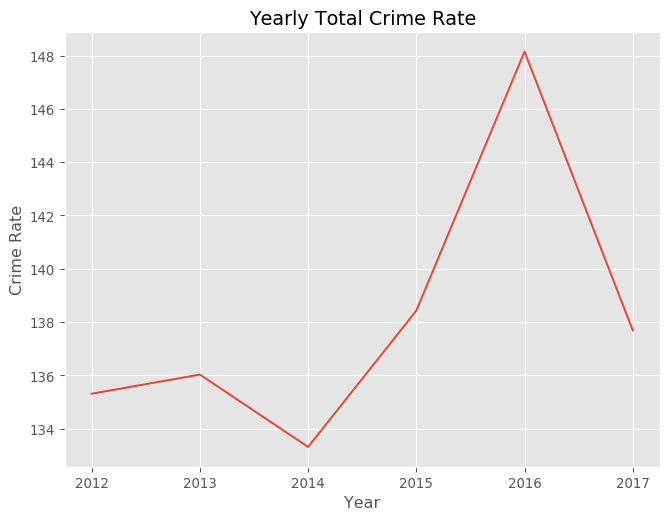

In [ ]:
#plot Yearly crime rate
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
cyeardata['Crime Rate'].plot(kind='line',ax=ax,figsize=(8,6))

# label
ax.set_title('Yearly Total Crime Rate')
ax.set_ylabel('Crime Rate')
ax.set_xlabel('Year')

fig.savefig('Yearly Total Crime Rate')

This graph shows
- The crime rate has gone up and down since 2012 but generally, it had an increasing trend. 
- Even though the crime rate had an increasing trend, it has decreased from 2016 to 2017. We can interpret this as the strategies police have applied were effective and the city has become safer.
- Crime rate can also be related to the recession because there is a spike in crime rate in 2016.

Additionally, we can compare the crime rate by city sectors, as shown in the following graph, to see if all sectors in Calgary follow the same pattern over the last 6 years. 

Sector,CENTRE,EAST,NORTH,NORTHEAST,NORTHWEST,SOUTH,SOUTHEAST,WEST
Year,,,,,,,,
2012,255.980642,210.517746,82.082351,138.360423,85.981943,105.615886,78.621376,95.295077
2013,274.438779,210.635800,79.531067,135.470986,85.528793,98.645671,76.125944,93.692176
2014,272.046469,212.176098,73.415835,127.665538,80.892106,98.820056,77.178012,92.969096
2015,284.142451,221.051902,72.261064,136.289866,80.673005,110.503928,80.932167,94.875520
2016,305.852013,244.614546,73.099752,152.603883,85.419102,117.609244,86.401634,102.588731


'Unstaked_cyearcdata'

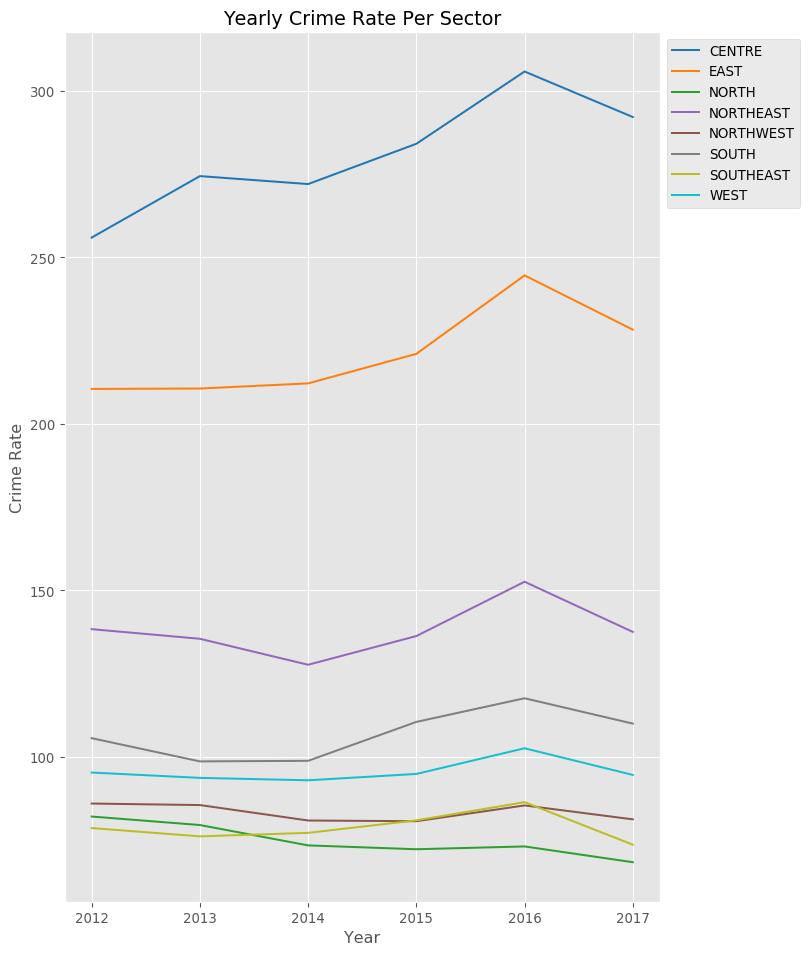

In [ ]:
# To calculate yearly crime rate per sector, group by sector and year then aggregate  crime Count and Resident Count 
cyearsdata = tdata.groupby(['Sector','Year']).agg({'Crime Count':'sum','Resident Count':'sum'})

# apply swaplevel to be able to calculate crime rate
cyearsdata=cyearsdata.swaplevel(0, 1, axis=0)

#display(cyearsdata.head())

# calculate Crime Rate
cyearsdata['Crime Rate'] = (cyearsdata['Crime Count']/cyearsdata['Resident Count'])*100000

display(cyearsdata['Crime Rate'].unstack('Sector').head(),"Unstaked_cyearcdata")

#Plot the results
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
cyearsdata['Crime Rate'].unstack('Sector').plot(kind='line',ax=ax,figsize=(8,12),colormap='tab10')

# label
ax.set_title('Yearly Crime Rate Per Sector')
ax.set_ylabel('Crime Rate')
ax.set_xlabel('Year')
plt.legend(bbox_to_anchor=(1.0,1.0))

fig.savefig('Yearly crime rate per sector')
plt.show()

- Breaking down the yearly trends by sector shows that most city sectors follow similar trends, but the overall trend for the city is mostly driven by the Center sector because of the high volume of crime in this sector.
- The graph also highlihts that City center and East sectors consistnetly show a higher crime rate.
- Furthermore, this graph shows that the North sector doesn't follow the overall trend and it has become safer over the last 6 years. 

In the next section, we analyze the trend of each crime category over the last 6 years.  

Crime Count  Resident Count  Crime Rate
Category               Year                                         
Assault (Non-domestic) 2012         2284         6514124   35.062274
                       2013         2313         6472923   35.733470
                       2014         2398         6797264   35.278900
                       2015         2392         6974443   34.296646
                       2016         1912         5283674   36.186941

'cyearcdata'

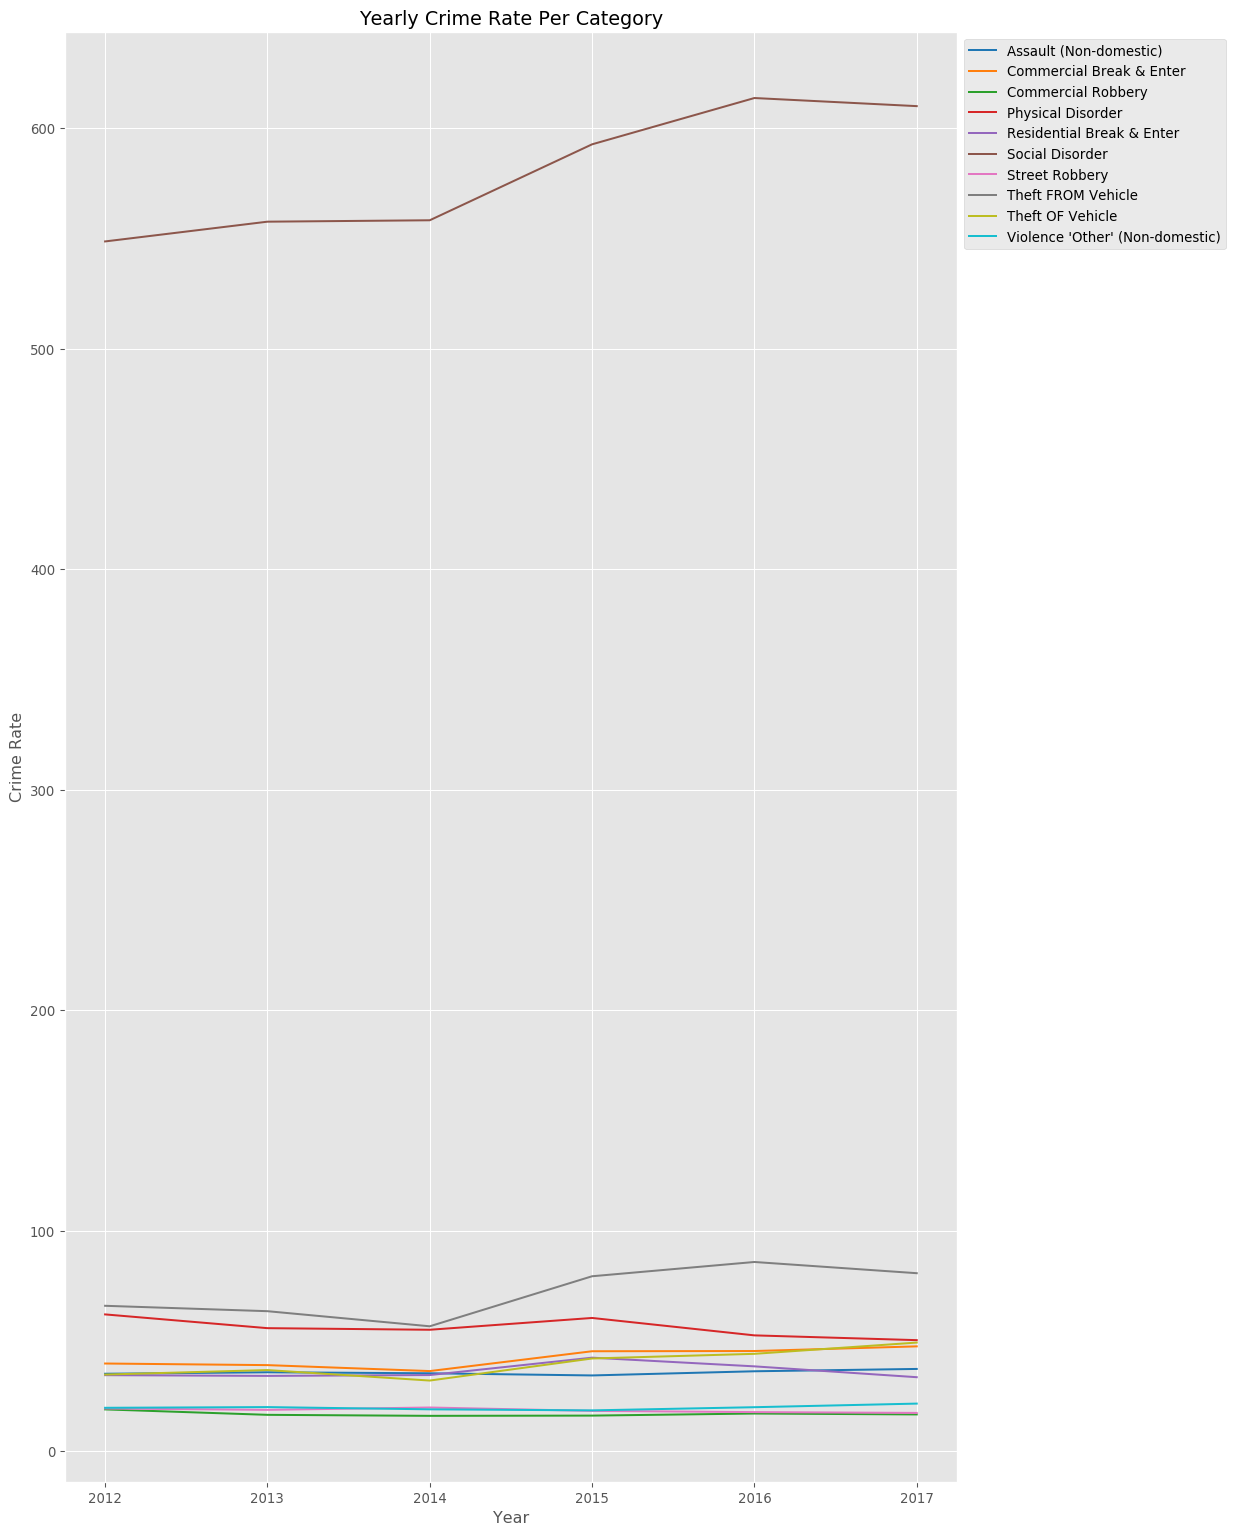

In [ ]:
# To calculate yearly crime rate per category, group by category and year then aggregate crime Count and Resident Count
cyearcdata = tdata.groupby(['Category','Year']).agg({'Crime Count':'sum','Resident Count':'sum'})
cyearcdata = cyearcdata.swaplevel(0,1, axis=0)


# calculate Crime Rate
cyearcdata['Crime Rate'] = (cyearcdata['Crime Count']/cyearcdata['Resident Count'])*100000

cyearcdata=cyearcdata.swaplevel(0,1, axis=0)
display(cyearcdata.head(),"cyearcdata")

#Plot data
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
cyearcdata['Crime Rate'].unstack('Category').plot(kind='line',ax=ax,figsize=(12,20),colormap='tab10')

#label
ax.set_title('Yearly Crime Rate Per Category')
ax.set_ylabel('Crime Rate')
ax.set_xlabel('Year')
plt.legend(bbox_to_anchor=(1.0,1.0))

fig.savefig('Yearly Crime Rate Per Category')
plt.show()

- As we can see from this graph, Social disorder and Thief from vehicle follow the general trend, but Assault, Commercial rubbery, Street rubbery, and Violence do not follow this trend. 
- Another observation is that while most crime categories have increased over time or stayed flat, Physical disorder has decreased over the last 6 years.

In the second part of our analysis, we look at the Crime frequency patterns over months.
In our analyses, the Crime frequency is defined by the sum of crime counts.
First, we look at the sum of monthly crime counts over the years 2012 to 2017. Then we break this down by year and analyze the changes in the monthly pattern over this period.

In [ ]:
# Data Wrangling Crime frequency patterns over months
timecdata = cdata.drop(['Community Center Point','Community Name','Resident Count'],axis=1)

# to get yearly total monthly crime count, group by month and Year, then sum  Crime count
monthyearcdata = timecdata.groupby(['Month','Year']).agg('sum')
display(monthyearcdata.head(5),"monthyearcdata")

# to get total monthly crime count over the years , unstack Year column and sum over it
monthyearcdata = monthyearcdata.unstack('Year')
monthlycdata = monthyearcdata.sum(axis=1)
display(monthlycdata)

Crime Count
Month Year             
1     2012         6848
      2013         6533
      2014         7562
      2015         8541
      2016         9278

'monthyearcdata'

Month
1     47830
2     46135
3     54036
4     55834
5     61947
6     63570
7     69768
8     66115
9     60816
10    59209
11    50890
12    48967
dtype: int64

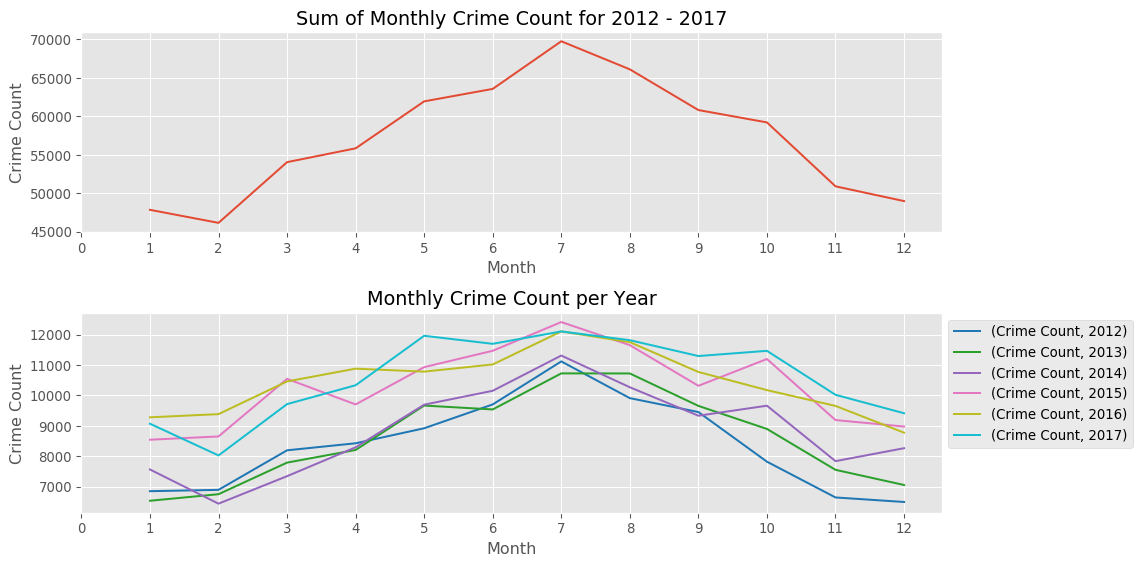

In [ ]:
fig = plt.figure()
axis = fig.add_subplot(2,1,1)

monthlycdata.plot(ax=axis,label='Year', figsize=(12,4))
plt.title('Sum of Monthly Crime Count for 2012 - 2017')
axis.set_xticks(np.arange(13))
axis.set_ylabel('Crime Count')
axis.set_xlabel('Month')
fig.savefig('Sum of Monthly Crime Count for 2012 - 2017')

axis1 = fig.add_subplot(2,1,2)
monthyearcdata.plot(ax=axis1,figsize=(12,6),colormap='tab10')
axis1.set_xticks(np.arange(13))
axis1.set_ylabel('Crime Count')
axis1.set_xlabel('Month')
plt.legend()
plt.title('Monthly Crime Count per Year')
fig.savefig('Monthly Crime Count per Year')
plt.legend(bbox_to_anchor=(1.0,1.0))
#to make sure graphs don't overlap
plt.tight_layout()

#fig.set_size_inches(12,4)


- The top graph shows the sum of monthly crime for the years 2012 to 2017. The most obvious pattern in that the crime count increases over warmer months. If we break this down by year (bottom graph), we can see that each year follows the same monthly pattern.

We would also want to investigate if this pattern is repeated over each crime category or city section. Because Social disorder category has a significantly higher crime count, we separated it from other categories and we have displayed the result in separate graphs to have a more clear representation of monthly patterns.

In [ ]:
# Group by Month and Category, then sum Crime Count
monthcategorycdata = timecdata.groupby(['Month','Category']).agg({'Crime Count':'sum'})
monthcategorycdata=monthcategorycdata.unstack('Category')
display(monthcategorycdata.head(5),"monthcategorycdata")


Crime Count                                              \
Category Assault (Non-domestic) Commercial Break & Enter Commercial Robbery   
Month                                                                         
1                          1098                     1276                157   
2                          1121                     1243                136   
3                          1190                     1430                135   
4                          1178                     1385                118   
5                          1305                     1432                 88   

                                                                      \
Category Physical Disorder Residential Break & Enter Social Disorder   
Month                                                                  
1                     2946                      1547           34217   
2                     3297                      1550           32783   
3                     3730                      1856           38801   
4                     3583                      1840           40653   
5                     3833                      2144           45608   

                                                             \
Category Street Robbery Theft FROM Vehicle Theft OF Vehicle   
Month                                                         
1                   230               3764             2081   
2                   200               3556             1780   
3                   242               4138             2071   
4                   216               4297             2075   
5                   213               4872             1962   

                                          
Category Violence 'Other' (Non-domestic)  
Month                                     
1                                    514  
2                                    469  
3                                    443  
4                                    489  
5                                    490

'monthcategorycdata'

In [ ]:
# filter Crime Count for only Social disorder
monthcategorycdata_socialdisorder_ungrouped=timecdata[timecdata["Category"]=="Social Disorder"]

# Group by Month and Category then sum Crime Count
monthcategorycdata_socialdisorder= monthcategorycdata_socialdisorder_ungrouped.groupby(['Month','Category']).agg({'Crime Count':'sum'})
monthcategorycdata_socialdisorder=monthcategorycdata_socialdisorder.unstack('Category')
display(monthcategorycdata_socialdisorder.head(5),"monthcategorycdata_socialdisorder")

# filter Crime Count for other categories that Social disorder
monthcategorycdata_notsocialdisorder_ungrouped=timecdata[timecdata['Category']!='Social Disorder']

# Group by Month and Category then sum Crime Count
monthcategorycdata_notsocialdisorder=monthcategorycdata_notsocialdisorder_ungrouped.groupby(['Month','Category']).agg({'Crime Count':'sum'})
monthcategorycdata_notsocialdisorder=monthcategorycdata_notsocialdisorder.unstack('Category')
display(monthcategorycdata_notsocialdisorder.head(5),"monthcategorycdata_notsocialdisorder")

,Crime Count
Category,Social Disorder
Month,
1,34217
2,32783
3,38801
4,40653
5,45608


'monthcategorycdata_socialdisorder'

Crime Count                                              \
Category Assault (Non-domestic) Commercial Break & Enter Commercial Robbery   
Month                                                                         
1                          1098                     1276                157   
2                          1121                     1243                136   
3                          1190                     1430                135   
4                          1178                     1385                118   
5                          1305                     1432                 88   

                                                                     \
Category Physical Disorder Residential Break & Enter Street Robbery   
Month                                                                 
1                     2946                      1547            230   
2                     3297                      1550            200   
3                     3730                      1856            242   
4                     3583                      1840            216   
5                     3833                      2144            213   

                                                                              
Category Theft FROM Vehicle Theft OF Vehicle Violence 'Other' (Non-domestic)  
Month                                                                         
1                      3764             2081                             514  
2                      3556             1780                             469  
3                      4138             2071                             443  
4                      4297             2075                             489  
5                      4872             1962                             490

'monthcategorycdata_notsocialdisorder'

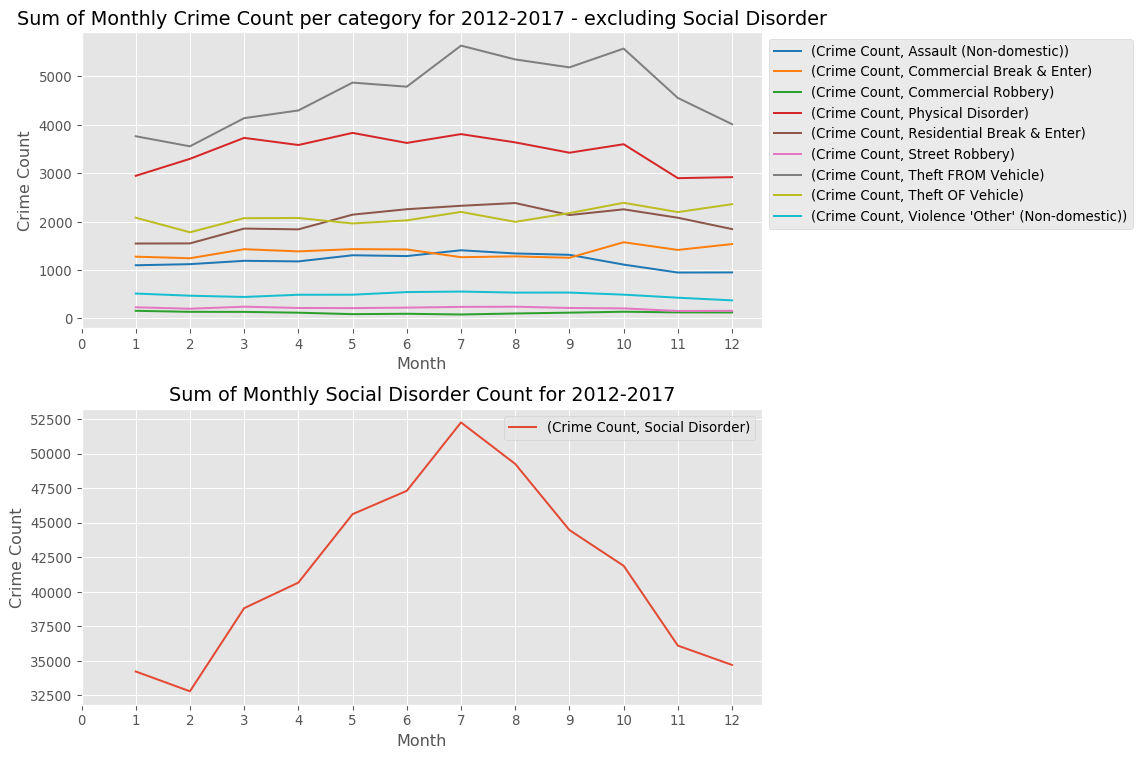

In [ ]:
fig = plt.figure()

axis = fig.add_subplot(2,1,1)
monthcategorycdata_notsocialdisorder.plot(ax=axis,figsize=(12,8),colormap='tab10')
plt.title('Sum of Monthly Crime Count per category for 2012-2017 - excluding Social Disorder')
axis.set_xticks(np.arange(13))
axis.set_ylabel('Crime Count')
axis.set_xlabel('Month')
fig.savefig('Sum of Monthly Crime Count per category for 2012-2017 - excluding Social Disorder')
plt.legend(bbox_to_anchor=(1.0,1.0))

axis1 = fig.add_subplot(2,1,2)
monthcategorycdata_socialdisorder.plot(ax=axis1,figsize=(12,8))
plt.title('Sum of Monthly Social Disorder Count for 2012-2017')
axis1.set_xticks(np.arange(13))
axis1.set_ylabel('Crime Count')
axis1.set_xlabel('Month')
fig.savefig('Sum of Monthly Social Disorder Count for 2012-2017')
plt.legend(bbox_to_anchor=(1.0,1.0))
#to make sure graphs don't overlap
plt.tight_layout()

The top graph shows the sum of monthly crime for the years 2012 to 2017 excluding Social disorder. The second graph shows the sum of monthly Social disorder count over the same period.  
- We can see that Theft from a vehicle, Assault, and Residential break and enter, as well as Social disorder increase in warmer months. There is also another spike in October for these crimes. On the other hand, Commercial robbery and street robbery do not vary significantly over the months.

- By comparing the second graph in this section and the sum of monthly crime count graph in the previous section, we can see that a big portion of the overall monthly crime count is attributed to Social disorder and its frequency pattern is highly driven by this crime category.

I the next section we break the sum of monthly crime count for the years 2012 to 2017 by sector to see if various city sectors follow the same pattern. Similar to the previous section, we display Social disorder separately to have a better representation.

In [ ]:
# Group by Month and Sector then sum Crime Count for social disorder category
monthsectorcdata_socialdisorder= monthcategorycdata_socialdisorder_ungrouped.groupby(['Month','Sector']).agg({'Crime Count':'sum'})
monthsectorcdata_socialdisorder=monthsectorcdata_socialdisorder.unstack('Sector')
display(monthsectorcdata_socialdisorder.head(),"monthsectorcdata_socialdisorder")

# Group by Month and Sector then sum Crime Count for non social disorder  category
monthsectorcdata_notsocialdisorder=monthcategorycdata_notsocialdisorder_ungrouped.groupby(['Month','Sector']).agg({'Crime Count':'sum'})
monthsectorcdata_notsocialdisorder=monthsectorcdata_notsocialdisorder.unstack('Sector')
display(monthsectorcdata_notsocialdisorder.head(),"monthsectorcdata_notsocialdisorder")

Crime Count                                                      
Sector      CENTRE  EAST NORTH NORTHEAST NORTHWEST SOUTH SOUTHEAST  WEST
Month                                                                   
1            12981  3135  2003      5593      2645  4480      1629  1751
2            12424  3025  1833      5518      2456  4291      1606  1630
3            14405  3682  2297      6411      3004  5067      1985  1950
4            15071  3865  2327      6662      3355  5254      1955  2164
5            16887  4501  2612      7296      3715  5888      2365  2344

'monthsectorcdata_socialdisorder'

Crime Count                                                     
Sector      CENTRE  EAST NORTH NORTHEAST NORTHWEST SOUTH SOUTHEAST WEST
Month                                                                  
1             3903  1426  1096      2526      1235  1737       991  699
2             4100  1350   944      2542      1205  1737       731  743
3             4607  1502  1189      2825      1269  2013       876  954
4             4302  1477  1162      2932      1425  1978       970  935
5             4686  1537  1268      3046      1608  2239      1033  922

'monthsectorcdata_notsocialdisorder'

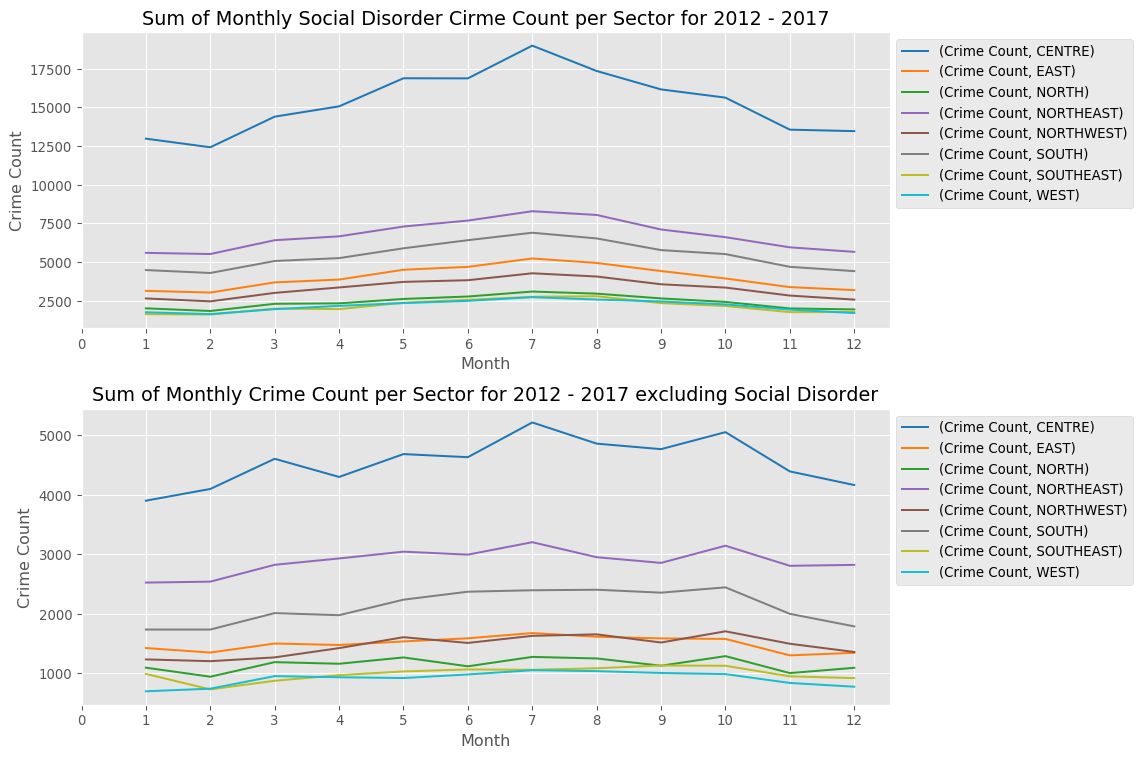

In [ ]:
fig = plt.figure()

axis = fig.add_subplot(2,1,1)
monthsectorcdata_socialdisorder.plot(ax=axis,figsize=(12,8),colormap='tab10')
plt.title('Sum of Monthly Social Disorder Cirme Count per Sector for 2012 - 2017')
axis.set_xticks(np.arange(13))
axis.set_ylabel('Crime Count')
axis.set_xlabel('Month')
fig.savefig('Sum of Monthly Social Disorder Crime Count per Sector for 2012 - 2017')
plt.legend(bbox_to_anchor=(1.0,1.0))


axis1 = fig.add_subplot(2,1,2)
monthsectorcdata_notsocialdisorder.plot(ax=axis1,colormap='tab10')
plt.title('Sum of Monthly Crime Count per Sector for 2012 - 2017 excluding Social Disorder')
axis1.set_xticks(np.arange(13))
axis1.set_ylabel('Crime Count')
axis1.set_xlabel('Month')
plt.legend(bbox_to_anchor=(1.0,1.0))
plt.title('Sum of Monthly Crime Count per Sector for 2012 - 2017 excluding Social Disorder')
#to make sure graphs don't overlap
plt.tight_layout()

- The top graph shows that Social disorder follows the same pattern in all city sectors.  As can be seen in the second graph, the noticeable difference for the rest of the crime categories is that they spike in some other months than the warm months. Particularly a spike in October for these categories is observed in most city sectors.

Another way to visualize crime distribution over time is through a choropleth. To do this, we made a grouping of our cleaned data by Community Name, Year, and Crime Count. This group had it's crime count totaled per community for each year between 2012 and 2017. From this grouping, we made a new dataframe so we could make yearly subsets to join into our geopandas dataframe for plotting purposes. Once the subsets were joined, we built a loop that would plot each years' subsetted data onto a choropleth and save the map on a local drive. By integrating those maps into a gif, we were able to animate the crime distribution change from 2012 to 2017.

In [ ]:
# Choropleth Data Wrangling

# Grouped cdata by Community Name, Year. Totaled community Crime Count. Made dataframe called chorodf.
choroy_df = pd.DataFrame(cdata.groupby(["Community Name","Year"])["Crime Count"].sum()).reset_index()

# Filitered choroy_df per year, dropped year column, and renamed header for joining geopandas dataframe
y12 = choroy_df[choroy_df["Year"] == 2012].drop(columns=["Year"]).rename(index=str, columns={"Crime Count": "12CC"}).set_index("Community Name")
y13 = choroy_df[choroy_df["Year"] == 2013].drop(columns=["Year"]).rename(index=str, columns={"Crime Count": "13CC"}).set_index("Community Name")
y14 = choroy_df[choroy_df["Year"] == 2014].drop(columns=["Year"]).rename(index=str, columns={"Crime Count": "14CC"}).set_index("Community Name")
y15 = choroy_df[choroy_df["Year"] == 2015].drop(columns=["Year"]).rename(index=str, columns={"Crime Count": "15CC"}).set_index("Community Name")
y16 = choroy_df[choroy_df["Year"] == 2016].drop(columns=["Year"]).rename(index=str, columns={"Crime Count": "16CC"}).set_index("Community Name")
y17 = choroy_df[choroy_df["Year"] == 2017].drop(columns=["Year"]).rename(index=str, columns={"Crime Count": "17CC"}).set_index("Community Name")

# Connected new crime count columns into geopandas dataframe
merged = map_df.set_index("name").join([y12,y13,y14,y15,y16,y17]) 

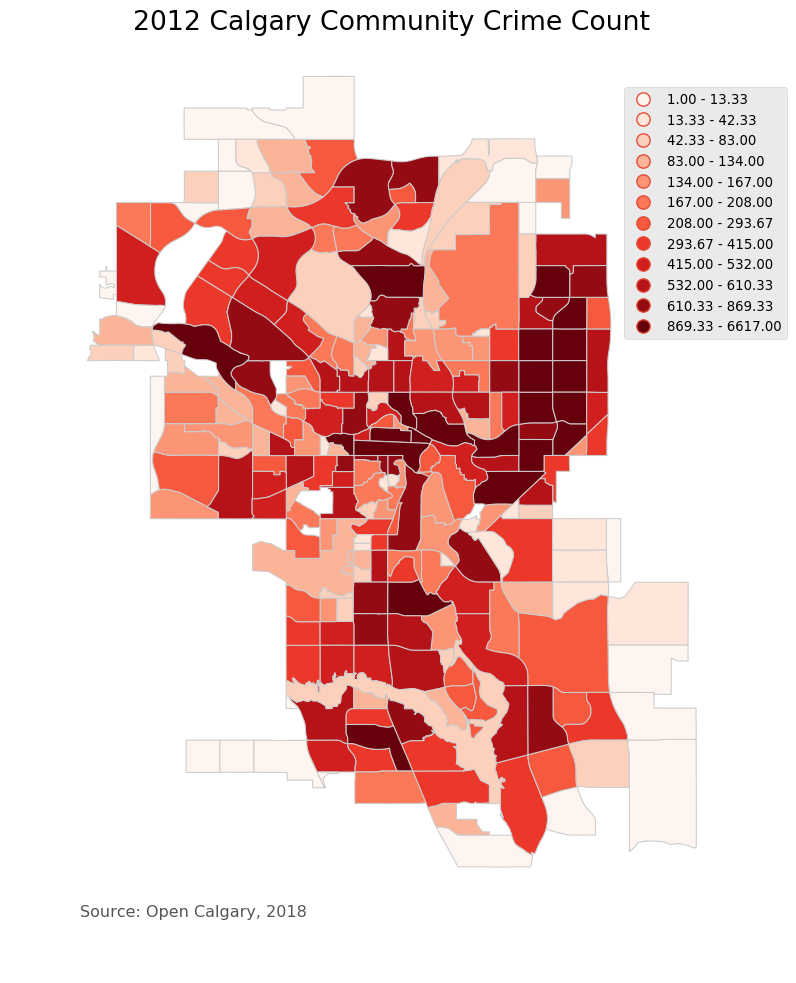

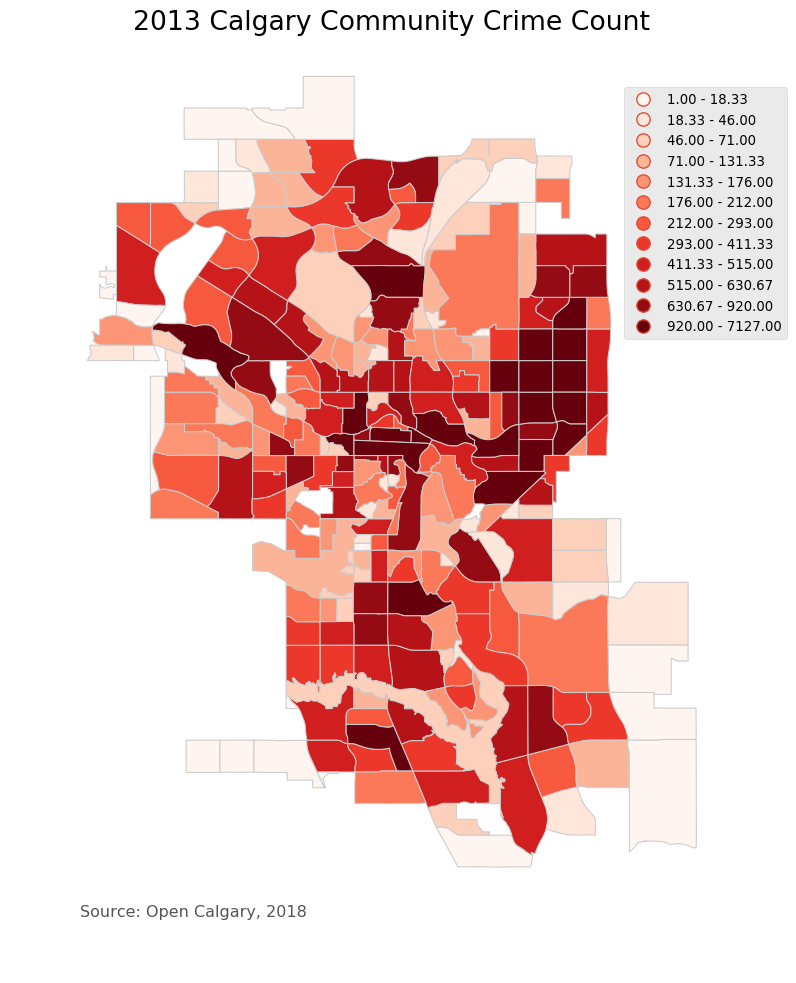

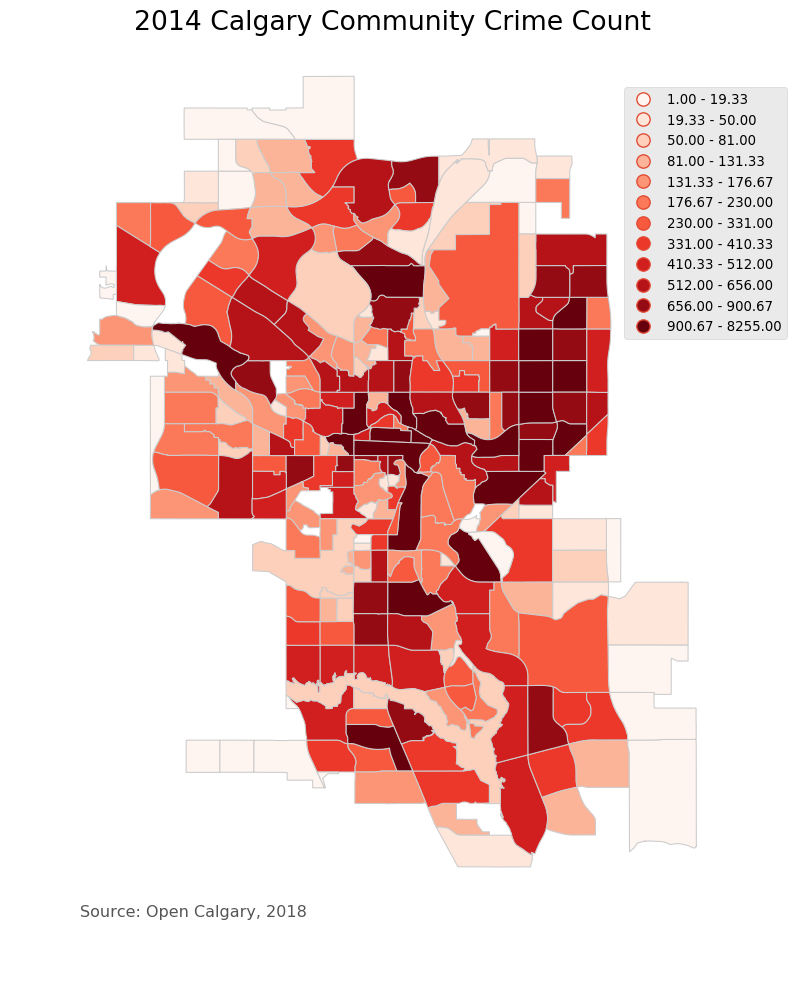

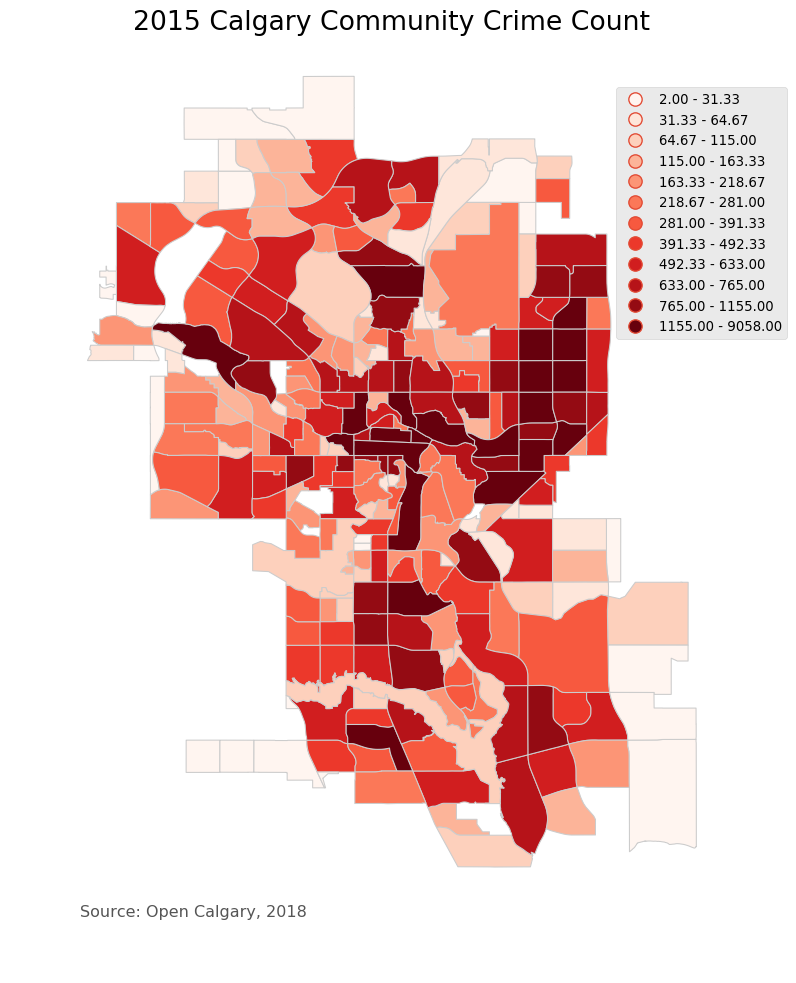

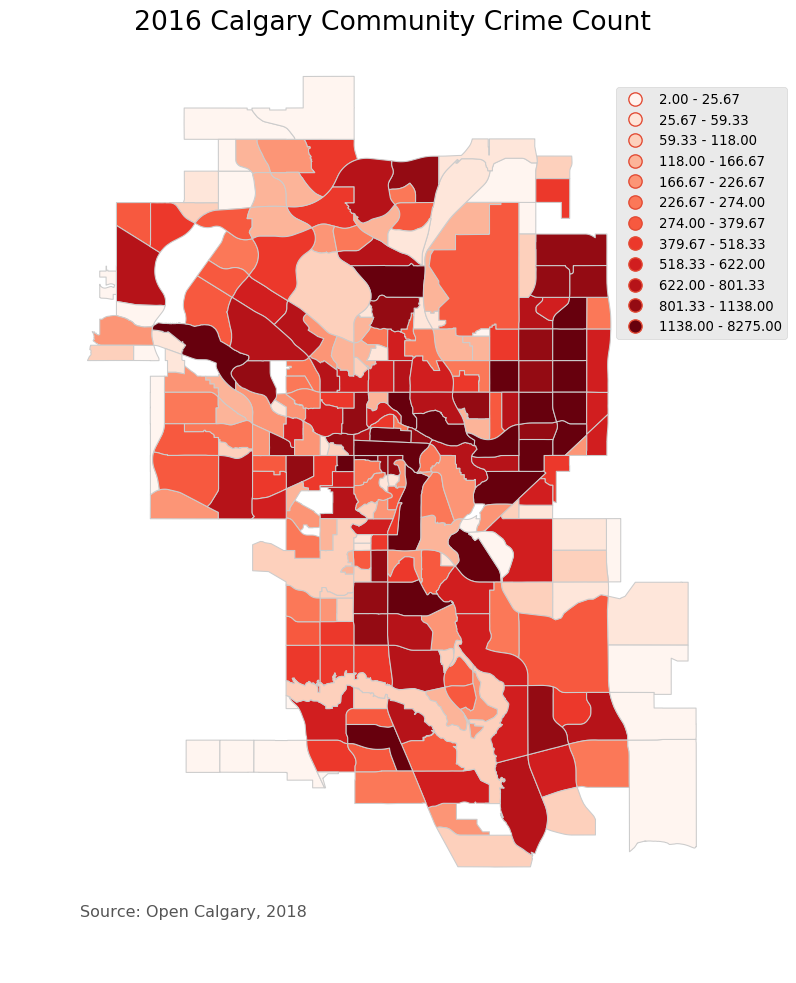

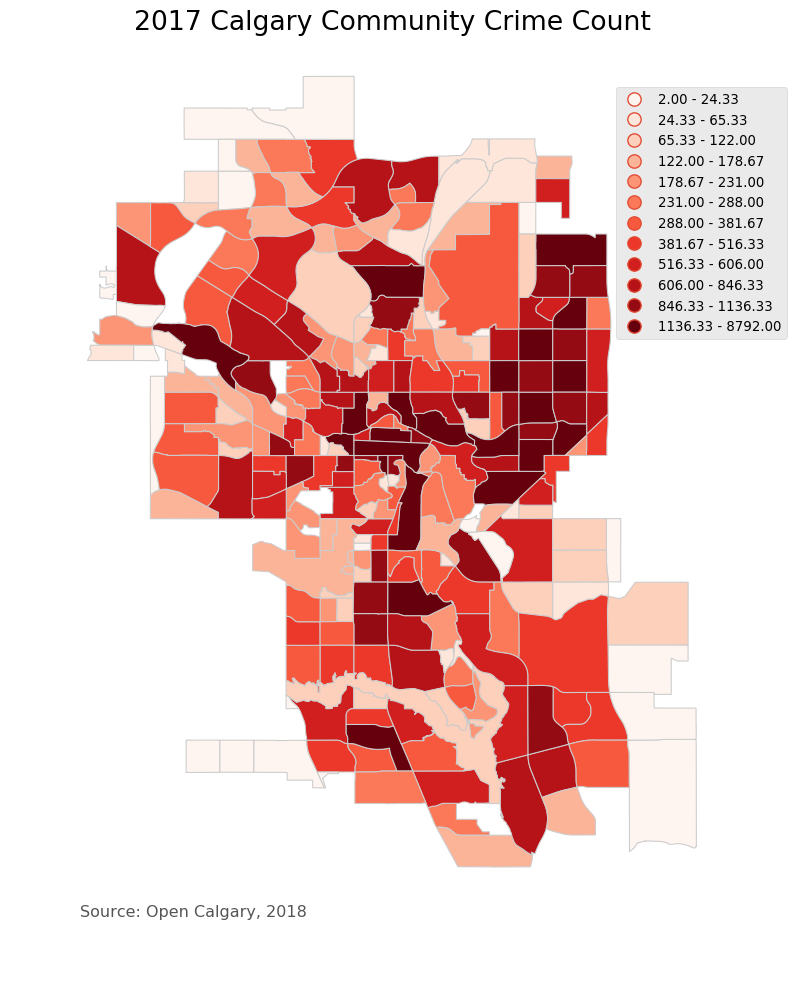

In [ ]:
# Annual Calgary Community Crime Count: Choropleth plotting

y = 2012 # year counter
# list of years (which are the column names at the moment)
loy = ["12CC","13CC","14CC","15CC","16CC","17CC"]


# For loop to create one map per year
for i in loy:
    fig, ax = plt.subplots(1, figsize=(9,12))
    mp = merged.dropna().plot(column=i, scheme="quantiles", k=12, cmap="Reds", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
    ax.axis("off")
    mp.set_title(str(y)+" Calgary Community Crime Count", fontdict={"fontsize": "20", "fontweight" : "3"})
    # position the annotation to the bottom left
    mp.annotate("Source: Open Calgary, 2018",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1.1, 0.95, 0., 0.))
    #fig.savefig(str(y)+"YYCCrimeCount.png", dpi=300)   --- command used for saving the images
    y += 1

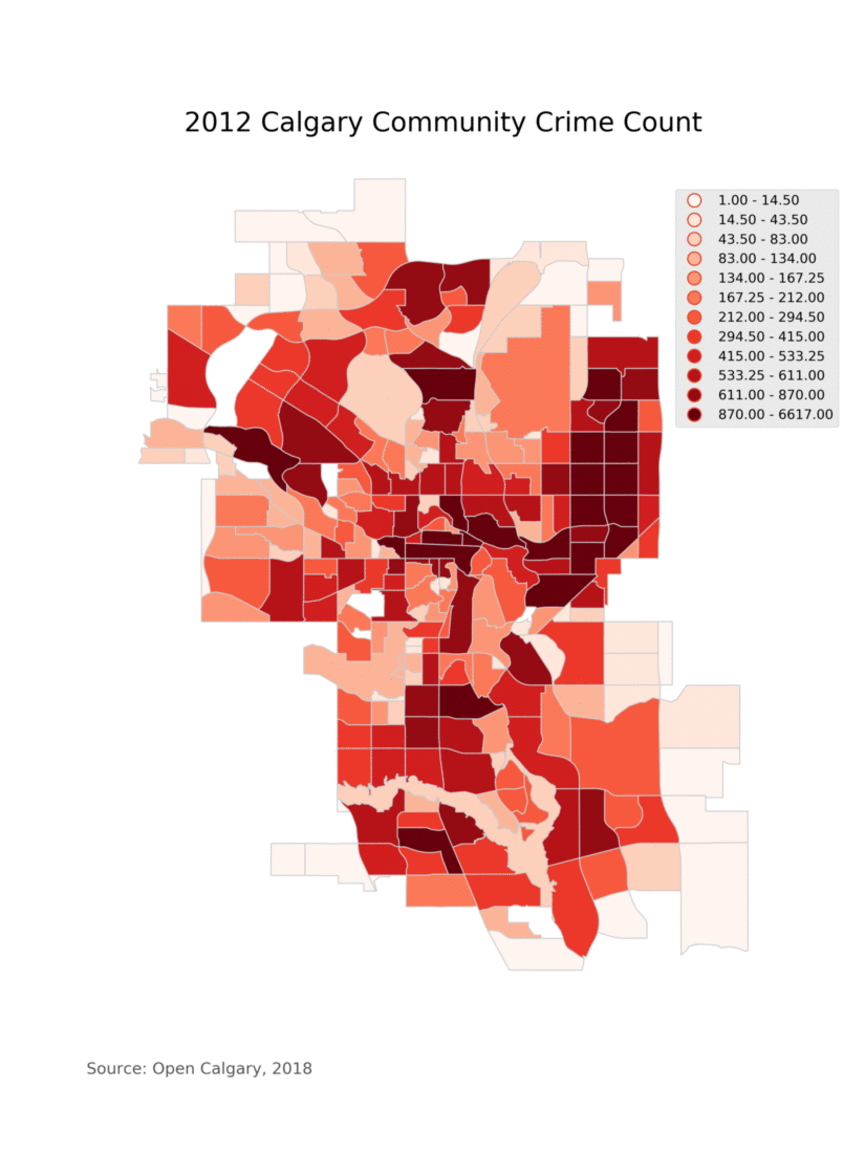

In [ ]:
# Annual Calgary Community Crime Count: Animation 
Image(filename="YYCCrimeCount.png")

- Communities with low to moderate levels of crime haven't become consistently better or worse in the previous six year period. From watching the plot above, the crime counts in these communities (in relation to others) merely fluctuate between having more crime some years and having less others. There is no discernable crime trend that civilians or law enforcement can take action on here.

- Communities with high levels of crime consistently maintain that status. As the animation loops, we see the darkest communities don't decrease their shade as the years change. 

- From both conclusions we get the sense that crime distribution across the city doesn't change. For both civilians and law enforcement, plots like these may prove to be quite useful. Civilians may want to avoid areas with high levels of crime as a safety precaution, and law enforcement may want to apply additional resources to these regions.

### Frequency of crime count by category

The type of reported crimes were categorized by Assault (non-domestic), Commercial Break & Enter, Commercial Robbery, Physical Disorder, Residential Break & Enter, Social Disorder, Street Robbery, Theft FROM Vehicle, Theft OF Vehicle, and Violence ‘Other’ (Non-domestic).

Social disorder events included drunk, disturbance, indecent act, juvenile complaint, landlord/tenant, mental health concern, neighbor dispute, party complaint, prowler, suspicious person, threats, drugs, noise complain, possible gunshots, unwanted guest/patron, prostitution, speeder, and suspicious auto. Fire, property damage and abandoned auto were classified under Physical disorder events.

To find the frequency of crime by category over the years and sectors of Calgary, we organized the data frame by Sector, Community Name, Category, Year and Month to generate the line graphs then Month was removed to generate the bar graphs. From the visualizations, crime distribution over the sectors show Centre with the most crime, Northeast and South follow after. We plotted all crime categories and found social disorder as the major contributing factor to crime count which is normal as there are many types of crimes under the category. 

Then social disorder was removed in the next graph to see the other distribution of crimes in each sector. Once removed, there was a general pattern of decrease in crime count for each category as following the rank of highest crime ridden sector to lowest. 

In [ ]:
# Group data by Sector, community name, category, year
categorysec = cdata.drop(['Month'],axis=1).groupby(['Sector','Community Name','Category','Year']).agg({'Crime Count':'sum','Resident Count':'mean'}) 
crimecount = categorysec['Crime Count'] # Split Categorysec Table to isolate Crime Count
residentcount = categorysec['Resident Count'] # Split Categorysec Table to isolate Resident Count

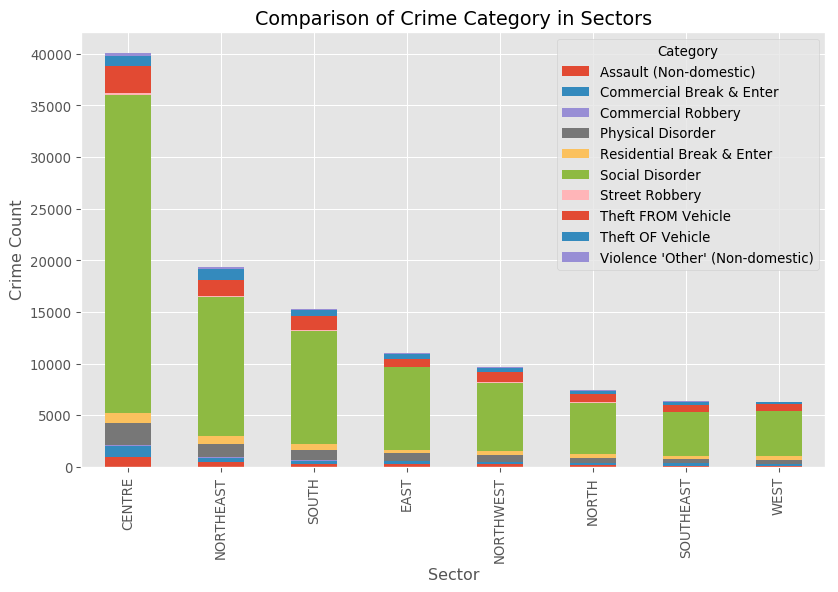

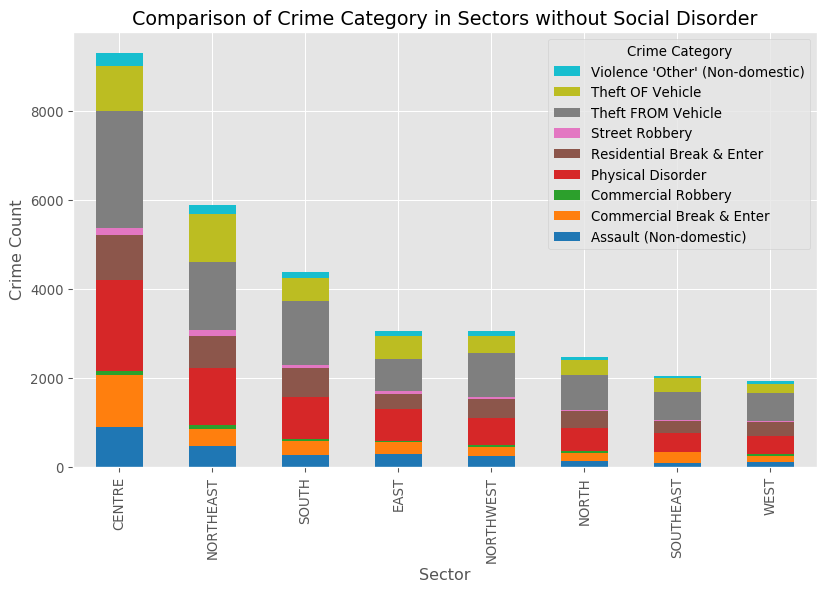

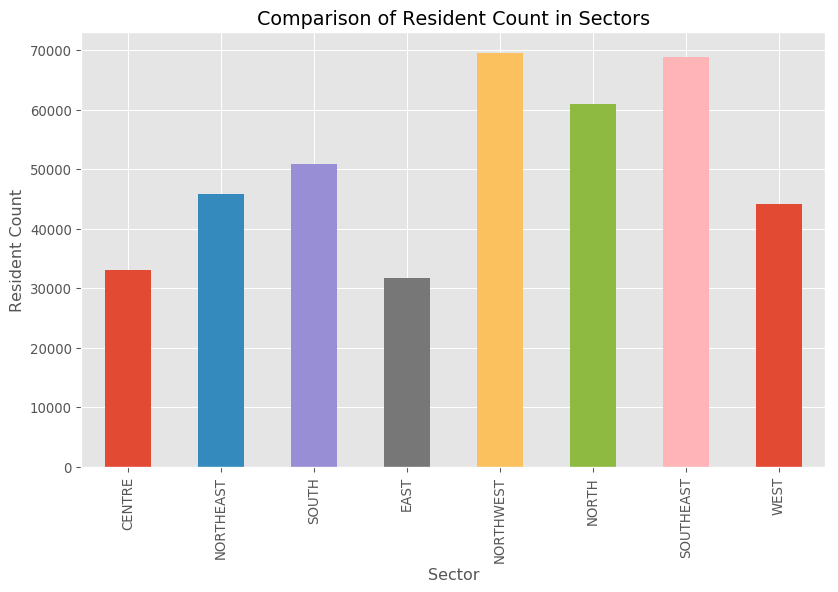

In [ ]:
avgcrime = crimecount.unstack('Year').mean(axis=1,skipna=True) # Average Crime count table over the years
secpercat = avgcrime.unstack('Community Name').sum(axis=1) # Plots a bar graph of different categories separarted by sectors

# Sort Category from Sector with highest crime count to lowest
sortcat = secpercat.sum(level='Sector').sort_values(ascending=False)
secpercat = secpercat.reindex(index=sortcat.index,level=0)

# Plot Categorical crimes per sector
fig = plt.figure()
ax=fig.add_subplot(1,1,1)
secpercat.unstack('Category').plot(kind = 'bar',ax=ax,stacked=True)
plt.title("Comparison of Crime Category in Sectors")
plt.ylabel('Crime Count')
fig.set_size_inches(10,6)

# Plot without social disorder category
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
secpercatNsoc = secpercat.unstack('Category').drop(['Social Disorder'],axis=1)
secpercatNsoc.plot(kind = 'bar',ax=ax,stacked=True,colormap='tab10')
plt.title("Comparison of Crime Category in Sectors without Social Disorder")
plt.ylabel('Crime Count')
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), title='Crime Category')
fig.set_size_inches(10,6)

avgres= residentcount.unstack('Year').mean(axis=1,skipna=True) # Average resident count table over the years
secres = avgres.unstack('Community Name').mean(axis=1,skipna=True)
secres = secres.sum(level='Sector')
secres = secres.reindex(index=sortcat.index)

# Plot of resident count per sector
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
secres.plot(kind='bar',ax=ax)
plt.title("Comparison of Resident Count in Sectors")
ax.set_ylabel('Resident Count')
fig.set_size_inches(10,6)



- Unfortunately, the scale was far too different to be able to see the smaller crime categories' distribution among the sectors correctly. Therefore, box plots of each crime was plotted over the sectors to find the average over the years. A plotly graph was used to allow the user to see each category and how its distributed among the sectors. 

- It is surprising to see how much reported crimes averaged over the last five years. There are quite an alarming amount of residential breaking and enterings in the South which brings it to a close second to the Northeast sector. Also there are quite a lot of theft from vehicles in the South sector. Breaking down the sectors show how the distribution of crime changes, overall Centre is first, but South comes in to close second and third at times.

- Overall crime was averaged over the sectors to produce box plot and pie chart to find whole city of Calgary's average crime distribution. Social Disorder contributes 72.18% to overall crime rate over Calgary and over 30,000 reported crimes were in Centre sector which is logical as it is the most common meeting place.

In [ ]:
# Box plot of category crime
'''Double click legend groups to isolate each categorical crime'''
test = cdata.groupby(['Sector','Category','Year']).sum()
test = test['Crime Count']
test = test.unstack('Category').unstack('Sector')

#PLOTLY
seclabel = pd.unique(cdata['Sector'])
catlabel = pd.unique(cdata['Category'])
data=[]
i = 0
for catl in catlabel:
    i += 1
    for secl in seclabel:
        t1 = {"type":"box",'y':test[catl][secl], 'legendgroup': catl, 'name': secl + ' - ' + catl}
        data.append(t1)

layout = go.Layout(
    autosize=False,
    width=1000,
    height=600,
    margin=go.Margin(
        l=50,
        r=50,
        b=275,
        t=0,
        pad=4
    )
)

fig = go.Figure(data=data,layout=layout)
plotly.iplot(fig,filename = "Multibox")
display(test.describe())

Category Assault (Non-domestic)                                      \
Sector                   CENTRE        EAST       NORTH   NORTHEAST   
count                  6.000000    6.000000    6.000000    6.000000   
mean                 888.000000  278.000000  112.500000  456.666667   
std                  152.729827   42.023803   18.501351   54.150408   
min                  737.000000  206.000000   94.000000  387.000000   
25%                  781.250000  263.250000   98.500000  438.750000   
50%                  862.000000  287.000000  109.500000  452.500000   
75%                  933.000000  302.500000  121.250000  458.750000   
max                 1156.000000  325.000000  142.000000  553.000000   

Category                                                  \
Sector     NORTHWEST       SOUTH   SOUTHEAST        WEST   
count       6.000000    6.000000    6.000000    6.000000   
mean      206.333333  248.166667   88.500000   97.500000   
std        38.877586   34.002451   16.991174   29.918222   
min       155.000000  207.000000   67.000000   59.000000   
25%       189.000000  220.500000   81.000000   89.250000   
50%       204.000000  249.000000   82.500000   93.500000   
75%       215.250000  276.000000  101.250000   98.500000   
max       272.000000  288.000000  111.000000  151.000000   

Category Commercial Break & Enter                ...     Theft OF Vehicle  \
Sector                     CENTRE        EAST    ...            SOUTHEAST   
count                    6.000000    6.000000    ...             6.000000   
mean                  1121.000000  270.333333    ...           293.666667   
std                    468.815529   81.387141    ...           102.396615   
min                    650.000000  193.000000    ...           178.000000   
25%                    760.000000  202.250000    ...           205.500000   
50%                   1027.500000  257.500000    ...           295.500000   
75%                   1407.500000  312.750000    ...           375.000000   
max                   1816.000000  399.000000    ...           416.000000   

Category             Violence 'Other' (Non-domestic)                          \
Sector          WEST                          CENTRE        EAST       NORTH   
count       6.000000                        6.000000    6.000000    6.000000   
mean      201.666667                      280.333333   94.333333   66.500000   
std        67.140648                       70.178819   16.597189   18.468893   
min       138.000000                      220.000000   68.000000   51.000000   
25%       140.750000                      241.000000   85.750000   55.250000   
50%       199.500000                      266.500000   98.500000   63.500000   
75%       254.500000                      277.000000  103.750000   65.750000   
max       279.000000                      416.000000  114.000000  102.000000   

Category                                                            
Sector     NORTHEAST   NORTHWEST       SOUTH  SOUTHEAST       WEST  
count       6.000000    6.000000    6.000000   6.000000   6.000000  
mean      202.166667   98.666667  137.333333  48.500000  49.333333  
std        26.468220   22.303961   31.487564  15.241391  13.125040  
min       176.000000   74.000000  103.000000  39.000000  37.000000  
25%       192.000000   86.000000  119.500000  40.250000  41.750000  
50%       194.500000   94.500000  134.000000  43.500000  46.500000  
75%       201.500000  104.500000  141.750000  46.000000  50.500000  
max       253.000000  138.000000  194.000000  79.000000  74.000000  

[8 rows x 80 columns]

Category,Assault (Non-domestic),Commercial Break & Enter,Commercial Robbery,Physical Disorder,Residential Break & Enter,Social Disorder,Street Robbery,Theft FROM Vehicle,Theft OF Vehicle,Violence 'Other' (Non-domestic)
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,310.135417,361.495833,46.529167,870.583333,514.964583,10426.539583,67.504167,1173.150000,540.252083,133.633333
std,268.684351,330.192087,23.883151,563.344457,257.184062,8859.387250,53.925402,682.732409,332.696589,83.864449
min,95.350000,137.600000,16.500000,402.033333,267.666667,4277.166667,15.083333,622.583333,206.566667,56.183333
25%,119.891667,199.504167,34.320833,491.233333,327.520833,4814.275000,33.637500,712.970833,317.079167,73.754167
50%,251.525000,251.966667,38.466667,664.650000,410.400000,7301.833333,49.391667,896.516667,436.383333,107.091667
75%,328.887500,331.583333,53.745833,1037.541667,666.462500,11551.154167,80.012500,1457.166667,640.708333,166.750000
max,901.966667,1155.683333,89.833333,2053.166667,1011.850000,30803.000000,169.166667,2628.533333,1091.700000,298.483333


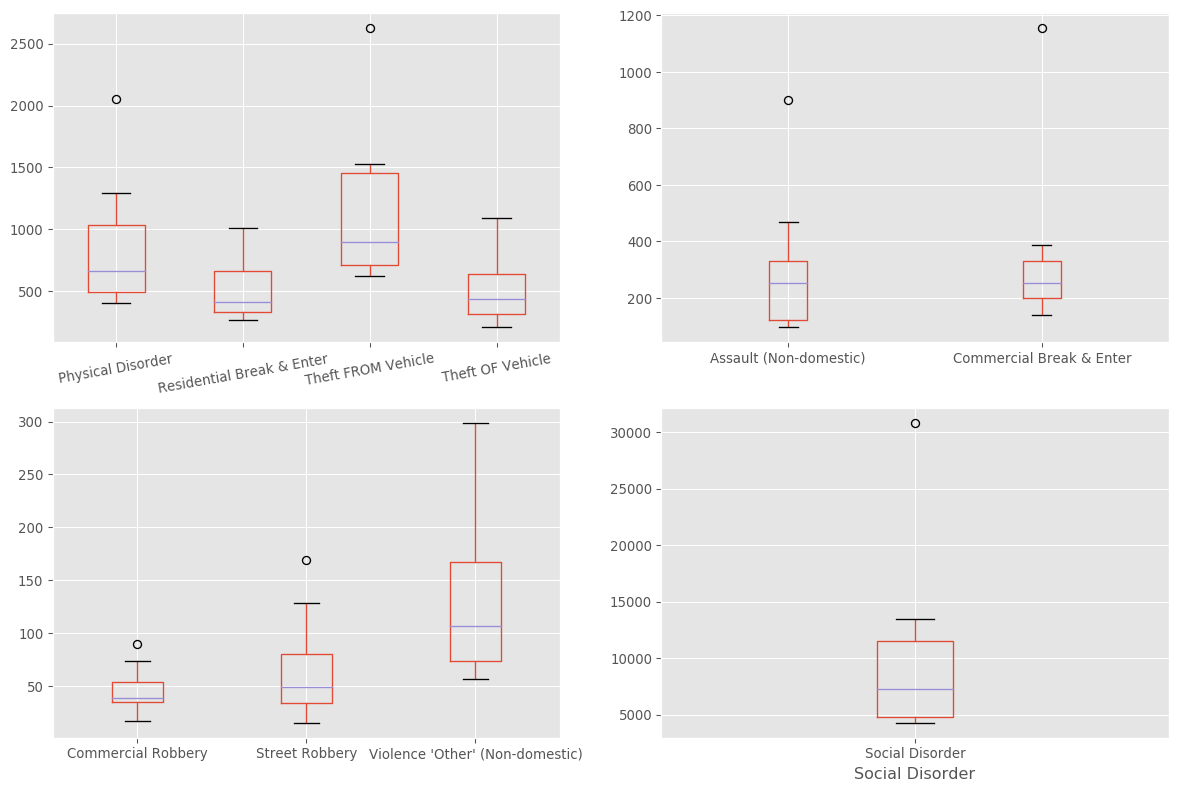

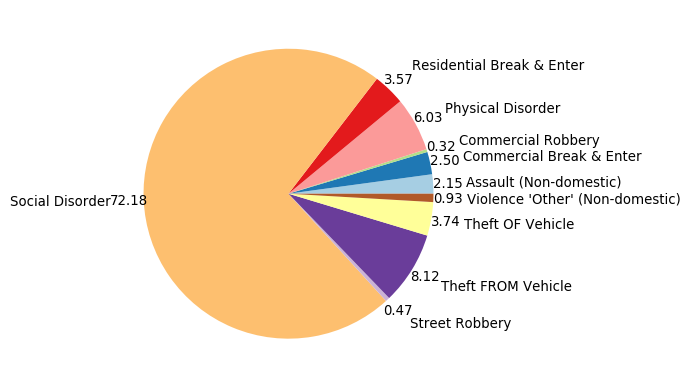

In [ ]:
# Box plot of average reported crimes throughout Calgary
test = avgcrime.groupby(['Sector','Category']).sum()
test = test.unstack('Category')
display(test.describe())
f426 = pd.concat([test['Physical Disorder'],test['Residential Break & Enter'],test['Theft FROM Vehicle'],test['Theft OF Vehicle']],axis=1)
df100 = pd.concat([test['Commercial Robbery'],test['Street Robbery'],test['Violence \'Other\' (Non-domestic)']],axis=1)

mid2000 = pd.concat([test['Assault (Non-domestic)'],test['Commercial Break & Enter']],axis=1)
high = pd.DataFrame(test['Social Disorder'])

fig = plt.figure()
ax=fig.add_subplot(2,2,1)
f426.plot(kind='box',ax=ax)
plt.xticks(rotation=10)

ax=fig.add_subplot(2,2,3)
df100.plot(kind='box',ax=ax)

ax=fig.add_subplot(2,2,2)
mid2000.plot(kind='box',ax=ax)

ax=fig.add_subplot(2,2,4)
high.plot(kind='box',ax=ax)
plt.xlabel('Social Disorder')
fig.set_size_inches(15,10)
plt.show()


# Pie chart of category crime

categorypie = secpercat.sum(level='Category')
categorypie.plot(kind='pie',figsize=(5,5),colormap='Paired',autopct='%.2f',pctdistance=1.1, labeldistance=1.23)
plt.ylabel('')
plt.show()

In [ ]:
# Data Wrangling Crime frequency and proportion to community population
crcatdata = cdata.drop(['Community Center Point','Month'],axis=1)
crcatdata = crcatdata.groupby(['Sector','Category','Community Name','Year']).agg({'Crime Count':'sum','Resident Count':'mean'})

rescount = crcatdata['Resident Count']
rescount = rescount.unstack(level='Category').mean(axis=1)
rescount = rescount.unstack(level='Community Name').sum(axis=1).astype(int)
rescount = rescount.unstack(level='Year')


cricount = crcatdata['Crime Count']
cricount = cricount.unstack(level='Category').sum(axis=1)
cricount = cricount.unstack(level='Community Name').sum(axis=1)
cricount = cricount.unstack()

population = rescount.sum()

#Proportion of crime to resident count
propcrime = cricount/rescount
propcrime= propcrime.mean(axis=1)

### Frequency of crime to community population

Data was further wrangled from the clean data to visualize crime versus population change. The columns Community Center Point and Month were removed and the table was further grouped by Sector, Category, Community Name and Year. We calculated the total crime count per group and found the average of the resident count as each row had the same number. The resident and crime count were separated in to two different data frames to isolate the numbers.

A bar graph was created to compare the resident and crime count of each sector. Major patterns of concern were sectors with increasing crime count. For example, Centre sector had continuous increase in crime count regardless of the population drop off in 2015. This was also evident in the East sector; population had very minor increases and decreases from 2012 to 2017 but crime increased between 2014 and 2015. The remaining sectors had increasing resident counts with increasing crime counts.

In the line graph, "Comparison of Crime and Resident Count in Sectors of Calgary", crime count had more sharper changes than resident count and does not respond to resident count as quickly over time. Between 2015 and 2016 when resident count dropped then increased, crime count did not respond immediately and continued to increase. More data may be required to find possible explanations for this trend.

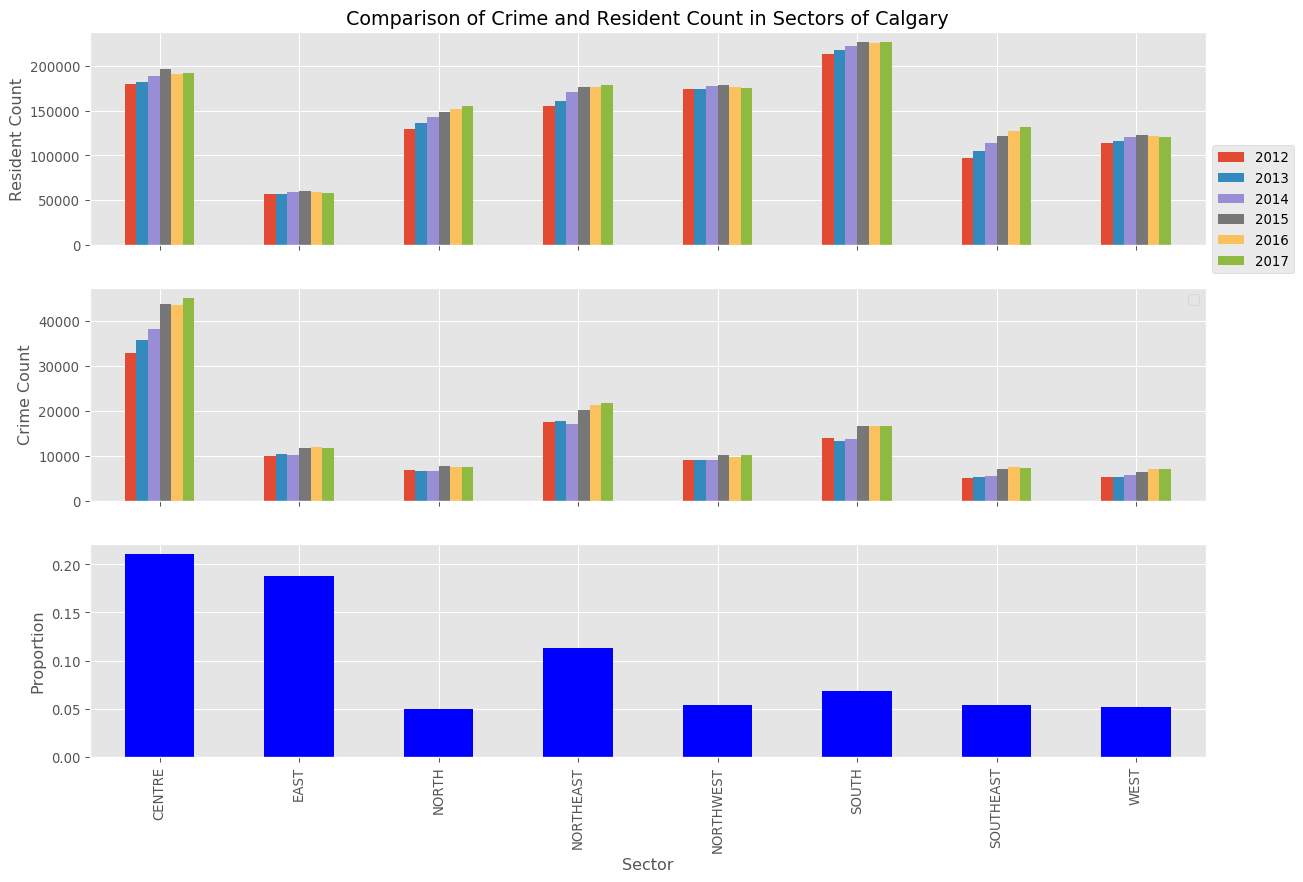

In [ ]:
# Visualization of crime count and resident count for each sector of Calgary (general plot)
fig = plt.figure()
axis = fig.add_subplot(3,1,1)
rescount.plot(kind='bar',ax=axis)
plt.title("Comparison of Crime and Resident Count in Sectors of Calgary")
plt.ylabel('Resident Count')
plt.legend(bbox_to_anchor=(1.0,0.5))
plt.xlabel("")
plt.tick_params(labelbottom=False)

axis = fig.add_subplot(3,1,2)
# cricount = cricount/rescount*100000
cricount.plot(kind='bar',ax=axis)
plt.xlabel("")
plt.tick_params(labelbottom=False)
plt.legend([])
plt.ylabel('Crime Count')

axis = fig.add_subplot(3,1,3)
propcrime.plot(kind='bar',ax=axis,color='b')
plt.ylabel('Proportion')

fig.set_size_inches(15,10)

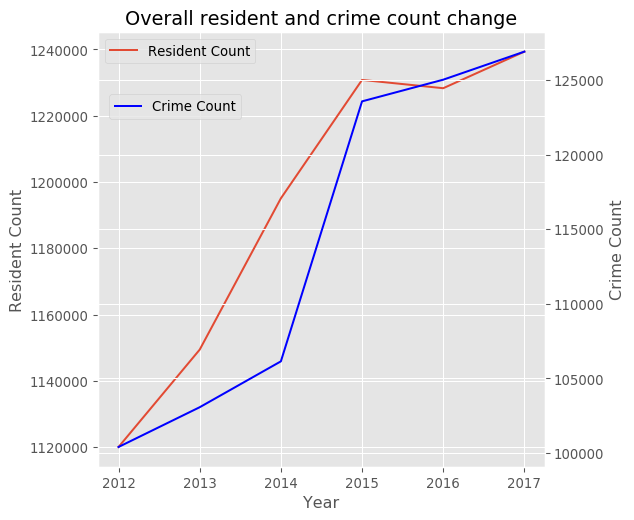

In [ ]:
# Visualization of crime count and resident count for each sector of Calgary (general plot)
# Data Wrangling Crime frequency and proportion to community population
crcatdata = cdata.drop(['Community Center Point','Month'],axis=1)
crcatdata = crcatdata.groupby(['Sector','Category','Community Name','Year']).agg({'Crime Count':'sum','Resident Count':'mean'})

rescount = crcatdata['Resident Count']
rescount = rescount.unstack(level='Category').mean(axis=1)
rescount = rescount.unstack(level='Community Name').sum(axis=1).astype(int)
rescount = rescount.unstack(level='Sector').sum(axis=1)


cricount = crcatdata['Crime Count']
cricount = cricount.unstack(level='Category').sum(axis=1)
cricount = cricount.unstack(level='Community Name').sum(axis=1)
cricount = cricount.unstack(level='Sector').sum(axis=1)

fig = plt.figure()
axis = fig.add_subplot(1,1,1)
rescount.plot(kind='line',ax=axis,label='Resident Count')
plt.title("Overall resident and crime count change")
plt.ylabel('Resident Count')

axis2 = axis.twinx()
cricount.plot(kind='line',ax=axis2,label='Crime Count',color='b')
plt.ylabel('Crime Count')
axis.legend()
axis2.legend(loc=[0.025,0.8])
fig.set_size_inches(6,6)

In [ ]:
def commlabel(datfram,col,name,col2):
    """ Function to organize labels for community name and dataframe
    datfram - dataframe
    col - column for boolen index (sort table)
    name - neighborhood name
    col2 - column to sort table by"""
    labdf = datfram[datfram[col]==name]
    labnames = labdf[col2].unique()
    return labnames, labdf

In [ ]:
# Generate East sector crime and resident count plot

comname, com = commlabel(cdata,'Sector','EAST','Community Name')

sector = com.drop(['Month','Community Center Point','Sector'],axis=1)
sector = sector.groupby(['Community Name','Category','Year']).agg({'Crime Count':'sum','Resident Count':'mean'})

# Split table by Resident Count and Crime Count
rescount = sector['Resident Count']
rescount = rescount.unstack('Year').mean(axis=1)
rescount = rescount.unstack('Category').mean(axis=1)

cricount = sector['Crime Count']

sortlabel = sector['Crime Count'].unstack('Year').mean(axis=1).unstack('Category').sum(axis=1).sort_values(ascending=False)
cricount = cricount.unstack('Year').mean(axis=1)
cricount = cricount.unstack('Category').sum(axis=1)

ind = np.arange(len(comname))  # the x locations for the groups
width = 0.35  # the width of the bars


t1 = go.Bar(x=comname, y=cricount.values,name='Crime Count')
t2 = go.Bar(x=comname, y=rescount.values,name='Resident Count')
data = [t1,t2]

layout = go.Layout(title='Community comparison within EAST Sector',
    xaxis=dict(title='Community Name'),
    yaxis=dict(title='Count'),
    autosize=False,
    width=800,
    height=500,
    margin=go.Margin(
        l=50,
        r=0,
        b=200,
        t=50,
        pad=4)
                  
    ) 
    
fig=go.Figure(data=data,layout=layout)
plotly.iplot(fig,filename="Communityplot")

In [ ]:
# 'CENTRE','EAST','WEST','NORTH','NORTHEAST','SOUTHEAST','NORTHWEST'

comname, com = commlabel(cdata,'Sector','NORTHWEST','Community Name')

sector = com.drop(['Month','Community Center Point','Sector'],axis=1)
sector = sector.groupby(['Community Name','Category','Year']).agg({'Crime Count':'sum','Resident Count':'mean'})

# Split table by Resident Count and Crime Count
rescount = sector['Resident Count']
rescount = rescount.unstack('Year').mean(axis=1)
rescount = rescount.unstack('Category').mean(axis=1)

cricount = sector['Crime Count']

sortlabel = sector['Crime Count'].unstack('Year').mean(axis=1).unstack('Category').sum(axis=1).sort_values(ascending=False)
cricount = cricount.unstack('Year').mean(axis=1)
cricount = cricount.unstack('Category').sum(axis=1)

ind = np.arange(len(comname))  # the x locations for the groups
width = 0.35  # the width of the bars


t1 = go.Bar(x=comname, y=cricount.values,name='Crime Count')
t2 = go.Bar(x=comname, y=rescount.values,name='Resident Count')
data = [t1,t2]

layout = go.Layout(title='Community comparison within NORTHWEST Sector',
    xaxis=dict(title='Community Name'),
    yaxis=dict(title='Count'),
    autosize=False,
    width=800,
    height=500,
    margin=go.Margin(
        l=50,
        r=0,
        b=200,
        t=50,
        pad=4)             
    ) 
    
fig=go.Figure(data=data,layout=layout)
plotly.iplot(fig,filename="Communityplot")

### Crime Distribution Across Communities 

To address this guiding question, we wanted to do so using choropleths again. For these maps, we made another grouping of cleaned data by Community Name and Crime Count, and then calculated the total community crime count for the previous six years. We created a new dataframe from this group so we could again make a new column of crime values in our geopandas dataframe by using the join function. 

The city-wide choropleth allows us to observe the distribution of crime across Calgary communities between the years 2012 and 2017. The choropleth's by sector allow us to zoom in on Calgary and through the crime counts listed in the legends, get a better sense of which neighbourhoods are more problematic than others.

In [ ]:
# Choropleth Data Wrangling

# Grouped cdata by Community Name, Year. Totaled community Crime Count. Made dataframe called chorodf.
choroa_df = pd.DataFrame(cdata.groupby("Community Name")["Crime Count"].sum()).reset_index()

# Filitered choroy_df per year, dropped year column, and renamed header for joining geopandas dataframe
yall = choroa_df.rename(index=str, columns={"Crime Count": "ACC"}).set_index("Community Name")

# Connected new crime count columns into geopandas dataframe
merged = map_df.set_index("name").join(yall) 

NameError: ignored

In [ ]:
# 2012-2017 Calgary Community Crime Count: Choropleth plotting

variable = "ACC" # choose which crime count column to plot
fig, ax = plt.subplots(1, figsize=(9,12)) # create figure and axes for matplotlib
ax.axis("off") #turned off graph-style axis'
merged.dropna().plot(column=variable, scheme="quantiles", k=12, cmap="Greens", linewidth=0.8, ax=ax, edgecolor="0.8",legend=True) # create choropleth
ax.set_title("2012-17 Calgary Community Crime Count", fontdict={"fontsize": "20", "fontweight" : "3"}) # choropleth title
ax.annotate("Source: Open Calgary, 2018",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555") # source annotation
leg = ax.get_legend() # create quantile legend 
leg.set_bbox_to_anchor((1.15, 0.95, 0., 0.)) # set legend location

- From this visual, we get a good sense of how Calgary communities compare to one another in crime. The east and northeastern ends of the city seem more crime ridden than others, and the downtown centre is also an area of concern. Besides those regions and a couple outliers, crime appears to be moderately distributed across the city. This choropleth reinforces the conclusions made from our choropleth's concerning crime distribution over time. 

In [ ]:
# 2012-2017 Calgary Community Crime Count by Sector - CENTRE/WEST/SOUTHEAST/SOUTH/NORTHWEST/NORTHEAST/NORTH/EAST: Choropleth plotting
sectors = merged["sector"].unique()

# For loop to create one map per sector
for i in sectors:
    # Similar plotting structure to the city-wide map previously
    sect = merged[merged["sector"] == i] # Filtering dataframe for specific sector
    fig, ax = plt.subplots(1, figsize=(6,8))
    mp = sect.dropna().plot(column="ACC", scheme="quantiles", k=6, cmap="Greens", linewidth=0.8, ax=ax, edgecolor="0.8", legend=True)
    ax.axis("off")
    mp.set_title("2012-17 Calgary Community Crime Count - "+i, fontdict={"fontsize": "20", "fontweight" : "3"})
    mp.annotate("Source: Open Calgary, 2018",xy=(0.1, .08),  xycoords="figure fraction", horizontalalignment="left", verticalalignment="top", fontsize=12, color="#555555")
    leg = ax.get_legend()
    leg.set_bbox_to_anchor((1.4, 0.95, 0., 0.))

- The choropleth's that visualize crime distribution by sector allow us to zoom in on the more troubling communities. From the above visuals, civilians and law enforcement alike get a better sense of the crime count variation between communities, and can pinpoint which neighbourhoods pose the most risk. In the Centre sector, we see Beltline, Bridgeland, and a couple industrial areas with high amounts of crime. In the West, Signal Hill, Glenbrook, and Rosscarrock are the sectors biggest troublemakers. Civilians and law enforcement that want more specific ways to visualize crime distribution across the city would find these plots useful.

## Conclusion

Throughout our analysis, we observed that the overall crime rate slightly increased from 2012 to 2017, but there was a big spike in the crime rate in 2016. This can be attributed to the worst period of the recent recession. A similar trend was observed for each city sector. City center and East sectors consistently displayed the highest crime rates.
Also, we demonstrated that the crime rate increases over the warm months with some crimes showing an additional spike in the month of October. The monthly crime rates vary from year to year but every year between 2012 to 2017 follows the same pattern. This pattern hold for almost all city sectors, despite the significant difference in the absolute crime rate among these sectors.


From the citizens' perspective, this information can help remind that in economic downturns they need to be more cautious and vigilant when it comes to crime. It can also help to highlight the City center and East sectors as riskier parts of the city, and that the warmer months of the year can be more trouble-prone. By looking at specific sectors, citizens can increase their awareness of surrounding communities. 
From the Police's perspective, this information can help add more resources to the City center and East sectors and put more forces out in the street over the warmer months of the year. It can also help the police to budget for more resources in economic downturns.

Overall, crime increases with population but does not respond as quickly to slight population changes. Whereas crime is distributed unevenly among the city where Centre has the majority of reported crimes followed by East and Northeast. The communities with the highest level of crime consistently maintain that reputation, regardless of what happens year after year, and communities with low to moderate levels of crime continue to fluctuate within those levels.

It will be interesting to combine the data with traffic flow, temperature and census data to study other correlations. Traffic flow may provide better insight on the amount of people travelling through sectors and provide patterns of crime. Temperature data will assist to confirm if warmer months warrant more crime. Census data will be interesting to study to see the distribution of age and people in each sector. 

### References
Cooley, B. (2018) Let’s make a map! Using Geopandas, Pandas and Matplotlib to make a Choropleth map [Online]. Available at: https://towardsdatascience.com/lets-make-a-map-using-geopandas-pandas-and-matplotlib-to-make-a-chloropleth-map-dddc31c1983d (Accessed: 30 September 2018)
Open Calgary, City of Calgary, Calgary Police Service. (2018) Community Crime Statistics [Online]. Available at: https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/848s-4m4z (Accessed: 19 September 2018).
Open Calgary, City of Calgary. (2018) City Boundary – Calgary city limits [Online]. Available at: https://data.calgary.ca/Base-Maps/City-Boundary/7t9h-2z9s (Accessed: 30 September 2018).
Contains information licensed under the Open Government Licence – City of Calgary. https://data.calgary.ca/d/Open-Data-Terms/u45n-7awa